## AULA 10:
### VIBRAÇÃO LIVRE DE SISTEMAS COM MÚLTIPLOS GRAUS DE LIBERDADE:

In [2]:
#importing python modules:

import numpy as np
import matplotlib.pyplot as plt
import pickle as pk
from MRPy import MRPy

Matriz de flexibilidade a partir da treliça do Ftool:

In [17]:
H1 = np.array([[0.0988, 0.1320, 0.1303, 0.1022, 0.0558],
               [0.1320, 0.2264, 0.2325, 0.1856, 0.1022],
               [0.1303, 0.2325, 0.2833, 0.2325, 0.1303],
               [0.1022, 0.1856, 0.2325, 0.2264, 0.1320],
               [0.0558, 0.1022, 0.1303, 0.1320, 0.0988]])*1e-6

F = 1000*np.array([1,1,1,1,1]).reshape(5,1)

u = np.matmul(H1,F)
print(u)

[[0.0005191]
 [0.0008787]
 [0.0010089]
 [0.0008787]
 [0.0005191]]


[[ 47201733.22340382 -33026873.6898548    4220847.49296942
    1369912.8653878     108146.2618636 ]
 [-33026873.68985479  51865295.65045626 -29836923.03065013
    2232348.60765655   1369912.86538779]
 [  4220847.49296939 -29836923.03065011  48620601.31515878
  -29836923.03065014   4220847.49296941]
 [  1369912.86538781   2232348.60765654 -29836923.03065013
   51865295.65045629 -33026873.68985482]
 [   108146.26186361   1369912.86538779   4220847.49296941
  -33026873.68985482  47201733.22340384]]


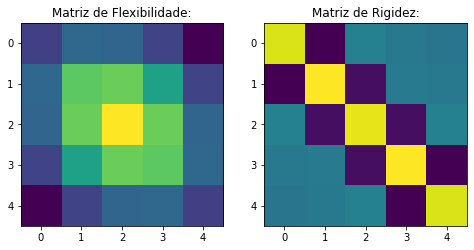

In [38]:
# Matriz de rigidez:

K1 = np.linalg.inv(H1)

#visualização das matrizes:
plt.figure(1, figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(H1); plt.title("Matriz de Flexibilidade:")
plt.subplot(1,2,2); plt.imshow(K1); plt.title("Matriz de Rigidez:")

In [42]:
F1 = 20000*np.ones((5,1))

u1 = np.linalg.solve(K1,F1)
u11 = np.matmul(H1,F1)

print(u1,u11)

[[0.010382]
 [0.017574]
 [0.020178]
 [0.017574]
 [0.010382]] [[0.010382]
 [0.017574]
 [0.020178]
 [0.017574]
 [0.010382]]


### 1.2 Lumped Mass Matrix:

[[2000.    0.    0.    0.    0.]
 [   0. 2000.    0.    0.    0.]
 [   0.    0. 2000.    0.    0.]
 [   0.    0.    0. 2000.    0.]
 [   0.    0.    0.    0. 2000.]]


Text(0.5, 1.0, 'Matriz de Massa Concentrada:')

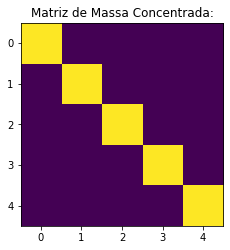

In [46]:
M1 = 2000*np.eye(5)
print(M1)

plt.figure(1, figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(M1); plt.title("Matriz de Massa Concentrada:")

Text(0, 0.5, 'phi(x)')

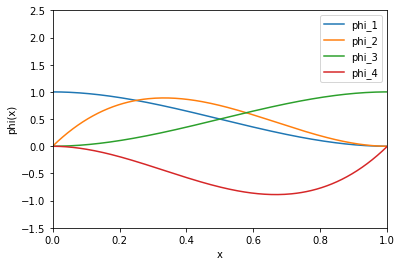

In [55]:
# Beam Lenght Discretization:
L = 6
x = np.linspace(0,L,200)

#Defining a list of lambda functions:
phi = []
phi.append(lambda xi: 1 - 3*xi**2 + 2*xi**3)
phi.append(lambda xi: L*(xi - 2*xi**2 + xi**3))
phi.append(lambda xi: 3*xi**2 - 2*xi**3)
phi.append(lambda xi: L*(-xi**2 + xi**3))

# Plotting:
plt.figure(2, figsize=(6,4), clear = True)

for k in range(4):
    plt.plot(x/L, phi[k](x/L))
    
plt.legend(['phi_1','phi_2','phi_3','phi_4'])
plt.xlim(0,1); plt.xlabel('x')
plt.ylim(-1.5,2.5); plt.ylabel('phi(x)')

In [83]:
L = 1
nL = 10000
x = np.linspace(0,L,nL)

# Defining a list of lambda functions:
phixx = []
phixx.append(lambda xi: (-6 +12*xi)/L/L)
phixx.append(lambda xi: (-4 + 6*xi)/L  )
phixx.append(lambda xi: (6 - 12*xi)/L/L)
phixx.append(lambda xi: (-2 + 6*xi)/L  )

K = np.zeros((4,4))
for ii in range(4):
    for jj in range(4):
        K[ii,jj] = np.trapz(phixx[ii](x/L)*phixx[jj](x/L), dx=L/nL)
        
np.set_printoptions(precision = 2)
print(K)

[[ 12.   6. -12.   6.]
 [  6.   4.  -6.   2.]
 [-12.  -6.  12.  -6.]
 [  6.   2.  -6.   4.]]


In [84]:


## steel rod 1m length with 6.5mm diameter
L  = 1.
EI = 2.05e11*(np.pi*0.0065**4)/64

# Stiffness coefficients in N/m
K2 = np.array([[ 12,   6*L,   -12,   6*L  ], 
               [ 6*L,  4*L*L, -6*L,  2*L*L], 
               [-12,  -6*L*L,  12,  -6*L*L], 
               [ 6*L,  2*L*L, -6*L,  4*L*L]])*(EI/L/L/L) 

print('Bending stiffness: {0:5.2f}Nm2'.format(EI))



Bending stiffness: 17.96Nm2


In [85]:


L  = 1
nL = 5000
x  = np.linspace(0, L, nL)

M  = np.zeros((4,4))

for ii in range(4):
    for jj in range(4):
        M[ii,jj] = np.trapz(phi[ii](x/L)*phi[jj](x/L), dx=L/nL)

np.set_printoptions(precision=1)
print(420*M)



[[156.  22.  54. -13.]
 [ 22.   4.  13.  -3.]
 [ 54.  13. 156. -22.]
 [-13.  -3. -22.   4.]]


In [86]:
## steel rod 1m length with 6.5mm diameter
L  = 1.0
mu = 7850*(np.pi*0.0065**2)/4

# Consistent masses in kg
M2 = np.array([[ 156,   22*L,   54,   -13*L ], 
               [ 22*L,  4*L*L,  13*L, -3*L*L], 
               [ 54,    13*L,   156,  -22*L ], 
               [-13*L, -3*L*L, -22*L,  4*L*L]])*(mu*L/420) 

print('Mass per unit length: {0:5.3f}kg/m'.format(mu))

np.set_printoptions(precision=3)
print(M2)

Mass per unit length: 0.260kg/m
[[ 0.097  0.014  0.033 -0.008]
 [ 0.014  0.002  0.008 -0.002]
 [ 0.033  0.008  0.097 -0.014]
 [-0.008 -0.002 -0.014  0.002]]


### 3 - Experimental Model with 3 D.O.F

In [88]:
## steel rod 81x20x0.5mm
L  = 0.081
EI = 2.05e11*(0.02*0.0005**3)/12
k  = 12*EI/L/L/L

# Stiffness coefficients in N/m
K3 = np.array([[ 2*k, -2*k,  0  ], 
               [-2*k,  4*k, -2*k], 
               [ 0,   -2*k,  4*k]])

print(K3)

[[ 1928.718 -1928.718     0.   ]
 [-1928.718  3857.437 -1928.718]
 [    0.    -1928.718  3857.437]]


In [90]:
# Lumped mass matrix in kg
M3 = np.array([[0.33,  0.00,  0.00], 
               [0.00,  0.33,  0.00], 
               [0.00,  0.00,  0.33]])

In [93]:
with open('resources/data/sample_KM.pk', 'wb') as target:
    pk.dump((K1, M1, K2, M2, K3, M3), target)

#with open('resources/data/sample_KM.pk', 'rb') as target:
#    K1, M1, K2, M2, K3, M3 = pk.load(target)